# OBJECTIVES
* Get Points of Interest from open data sources like open street maps (OSM) - We have used overpass turbo to get infomation about different Amenites( cafe,pub,bar,etc.) of Mumbai.We exported a json file of this information from overpass turbo and used mygeodata converter(https://mygeodata.cloud/converter/) to get a export.csv file.
* Understand how spatial location data works
* Understand spatial vector data types and how to manipulate it 
* Understand GIS concepts like projections, spatial clustering, etc.
* Figure out a way of clustering these points into commercial centers/markets - We have used kMeans clustering in this project
* Find and label the most significant clusters, statistically and intuitively. 
* Visualize the resultant commercial centres/markets. 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

* Read github readme to know how to get export.csv file

In [2]:
df = pd.read_csv('export.csv')

In [3]:
df.head()

,X,Y,id,@id,amenity,name,source,AND_a_nosr_p,brand,fuel:diesel,...,payment:credit_cards,air_conditioning,diaper,drinking_water,unisex,Guard_type,name:he,bar,shelter_type,height
0,72.832575,18.927571,node/245653876,node/245653876,restaurant,Copper Chimney,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72.827294,18.942228,node/245654537,node/245654537,parking,Premier,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,72.826900,18.942400,node/245654550,node/245654550,parking,Liberty,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72.836902,18.956702,node/245655797,node/245655797,parking,Qamar,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.805847,18.964323,node/245656700,node/245656700,parking,Kemp's Corner,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.amenity.drop_duplicates()

0            restaurant
1               parking
5          parking;fuel
6                  fuel
8       vending_machine
             ...       
3693           jeweller
3702            clothes
3704             beauty
3708        prep_school
3721     driving_school
Name: amenity, Length: 92, dtype: object

In [5]:
restaurant = df[df['amenity']=='restaurant'][['X','Y']]
cinemas = df[df['amenity']=='cinema'][['X','Y']]
fountain = df[df['amenity']=='fountain'][['X','Y']]
shelter = df[df['amenity']=='shelter'][['X','Y']]
parking = df[df['amenity']=='parking'][['X','Y']]
community_centre = df[df['amenity']=='community_centre'][['X','Y']]
fuel = df[df['amenity']=='community_centre'][['X','Y']]
vending_machine = df[df['amenity']=='vending_machine'][['X','Y']]
bank = df[df['amenity']=='bank'][['X','Y']]
atm = df[df['amenity']=='atm'][['X','Y']]
theatre = df[df['amenity']=='theatre'][['X','Y']]
hospital = df[df['amenity']=='hospital'][['X','Y']]
post_office = df[df['amenity']=='post_office'][['X','Y']]
school = df[df['amenity']=='school'][['X','Y']]
fast_food = df[df['amenity']=='fast_food'][['X','Y']]
studio = df[df['amenity']=='studio'][['X','Y']]
college = df[df['amenity']=='college'][['X','Y']]
ice_cream = df[df['amenity']=='ice_cream'][['X','Y']]
cafe = df[df['amenity']=='cafe'][['X','Y']]
pharmacy = df[df['amenity']=='pharmacy'][['X','Y']]
jeweller = df[df['amenity']=='jeweller'][['X','Y']]
electronics = df[df['amenity']=='electronics'][['X','Y']]
clothes = df[df['amenity']=='clothes'][['X','Y']]
beauty_saloon = df[df['amenity']=='beauty'][['X','Y']]
driving_school = df[df['amenity']=='driving_school'][['X','Y']]
dental_clinic = df[df['amenity']=='dentist'][['X','Y']]
taxi = df[df['amenity']=='taxi'][['X','Y']]
gym = df[df['amenity']=='gym'][['X','Y']]
bar = df[df['amenity']=='bar'][['X','Y']]
pub = df[df['amenity']=='pub'][['X','Y']]
restroom = df[df['amenity']=='restroom'][['X','Y']]
night_club = df[df['amenity']=='nightclub'][['X','Y']]
car_rental = df[df['amenity']=='car_rental'][['X','Y']]
internet_cafe = df[df['amenity']=='internet_cafe'][['X','Y']]
optician = df[df['amenity']=='optician'][['X','Y']]
electronics_repair = df[df['amenity']=='electronics_repair'][['X','Y']]

In [6]:
optician

,X,Y
3687,72.909472,19.115948
3689,72.909767,19.117053
3695,72.912005,19.119180
3698,72.911928,19.119422
3705,72.911416,19.118956


In [7]:
restaurant.shape, cinemas.shape, fountain.shape, shelter.shape, parking.shape, community_centre.shape, fuel.shape, vending_machine.shape, bank.shape, atm.shape, theatre.shape, hospital.shape, post_office.shape, fast_food.shape, school.shape, studio.shape, college.shape, ice_cream.shape, cafe.shape, pharmacy.shape, jeweller.shape, electronics.shape, clothes.shape, beauty_saloon.shape, driving_school.shape, dental_clinic.shape, taxi.shape, gym.shape, bar.shape, pub.shape, restroom.shape, night_club.shape, car_rental.shape, internet_cafe.shape,optician.shape, electronics_repair.shape

((550, 2),
 (47, 2),
 (13, 2),
 (12, 2),
 (64, 2),
 (23, 2),
 (23, 2),
 (4, 2),
 (405, 2),
 (163, 2),
 (25, 2),
 (137, 2),
 (44, 2),
 (233, 2),
 (162, 2),
 (3, 2),
 (30, 2),
 (19, 2),
 (200, 2),
 (87, 2),
 (4, 2),
 (8, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (12, 2),
 (32, 2),
 (4, 2),
 (43, 2),
 (15, 2),
 (4, 2),
 (4, 2),
 (1, 2),
 (1, 2),
 (5, 2),
 (2, 2))

In [8]:
from sklearn.cluster import KMeans

In [9]:
restaurant.shape, cinemas.shape, fountain.shape, shelter.shape, parking.shape, community_centre.shape, fuel.shape, vending_machine.shape, bank.shape, atm.shape, theatre.shape, hospital.shape, post_office.shape, fast_food.shape, school.shape, studio.shape, college.shape, ice_cream.shape, cafe.shape, pharmacy.shape, jeweller.shape, electronics.shape, clothes.shape, beauty_saloon.shape, driving_school.shape, dental_clinic.shape, taxi.shape, gym.shape, bar.shape, pub.shape, restroom.shape, night_club.shape, car_rental.shape, internet_cafe.shape,optician.shape, electronics_repair.shape

((550, 2),
 (47, 2),
 (13, 2),
 (12, 2),
 (64, 2),
 (23, 2),
 (23, 2),
 (4, 2),
 (405, 2),
 (163, 2),
 (25, 2),
 (137, 2),
 (44, 2),
 (233, 2),
 (162, 2),
 (3, 2),
 (30, 2),
 (19, 2),
 (200, 2),
 (87, 2),
 (4, 2),
 (8, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (12, 2),
 (32, 2),
 (4, 2),
 (43, 2),
 (15, 2),
 (4, 2),
 (4, 2),
 (1, 2),
 (1, 2),
 (5, 2),
 (2, 2))

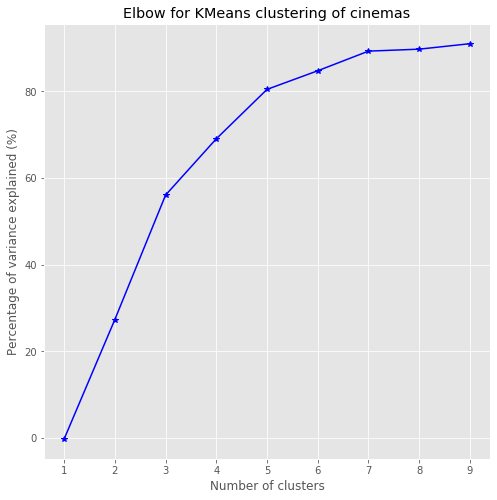

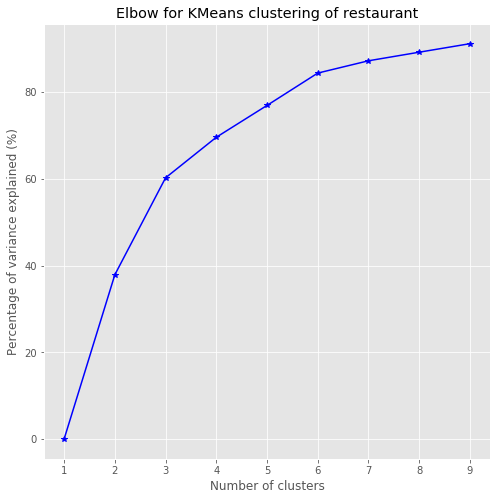

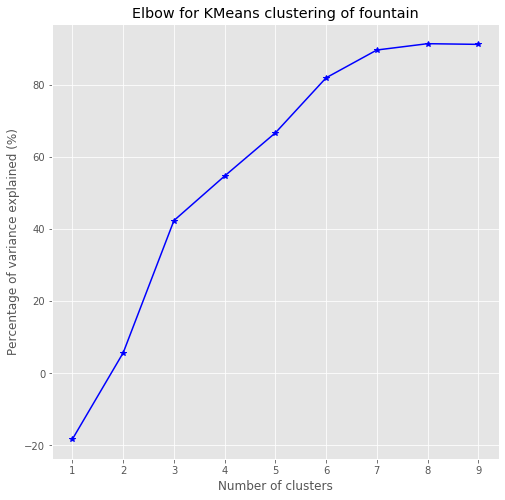

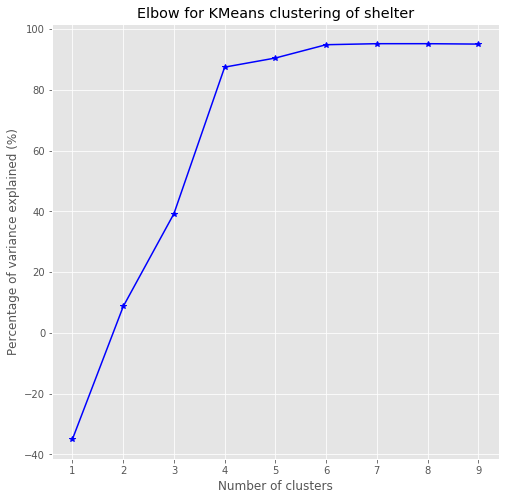

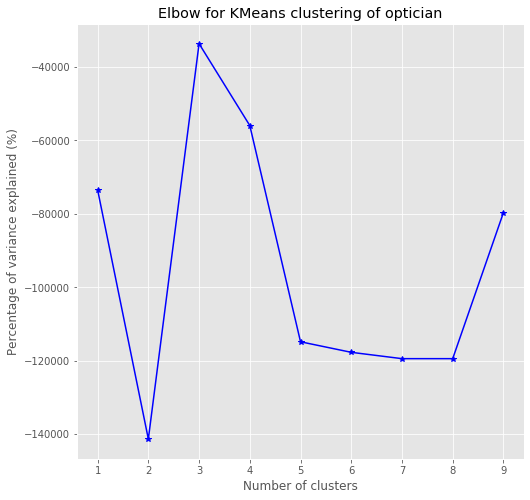

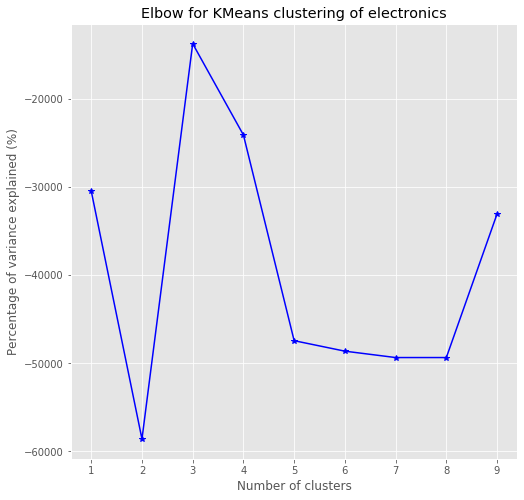

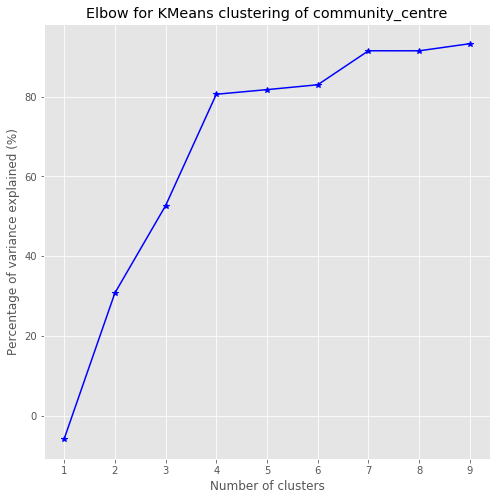

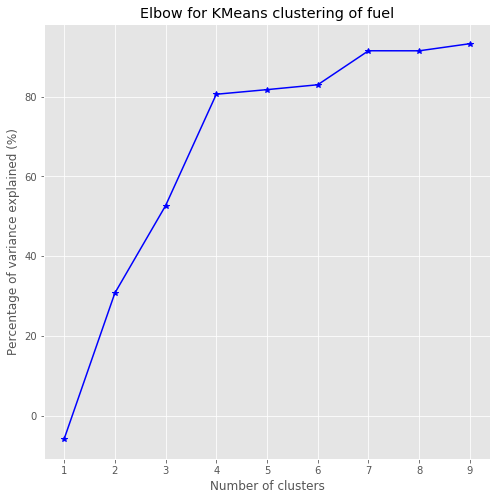

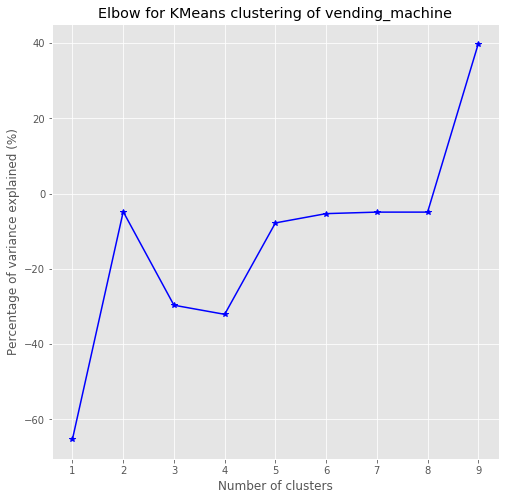

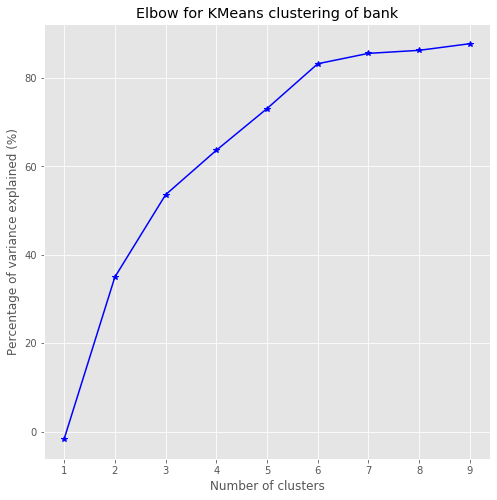

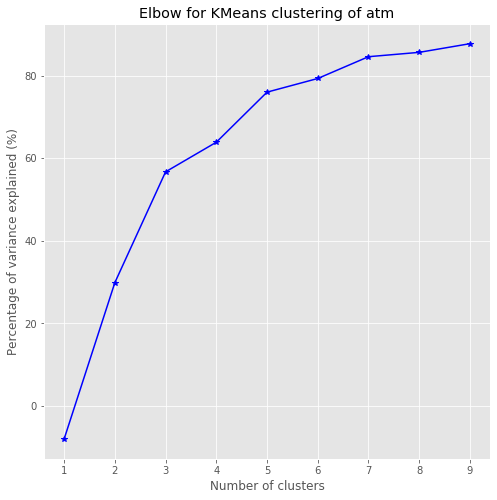

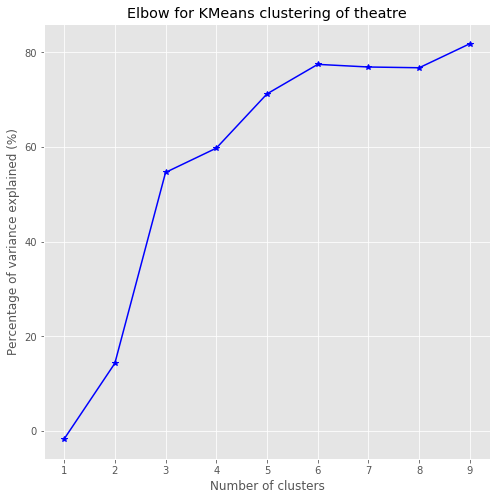

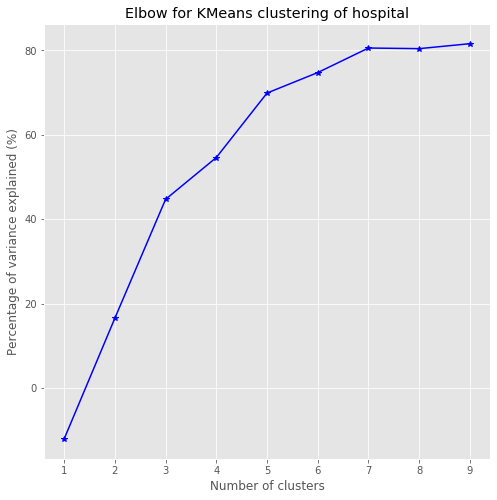

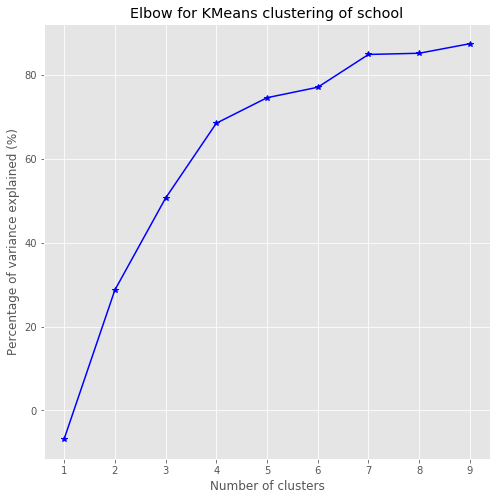

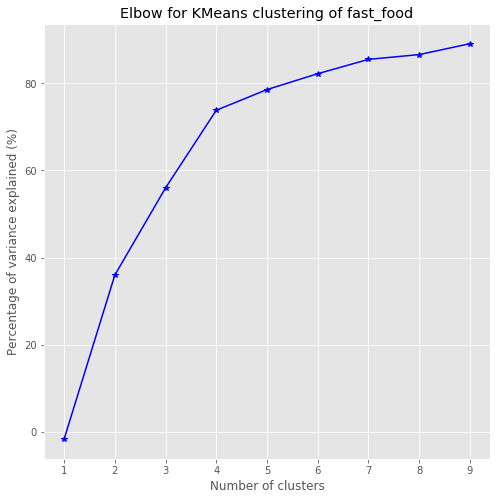

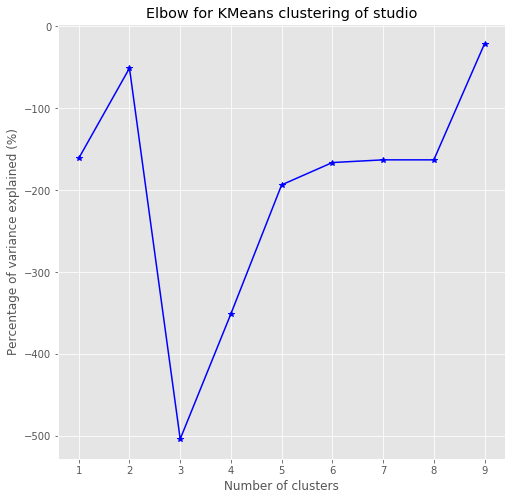

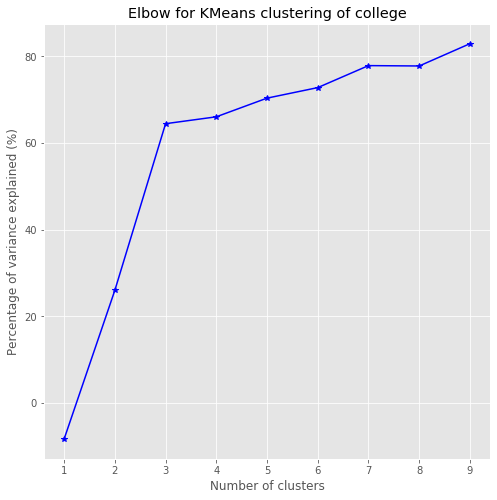

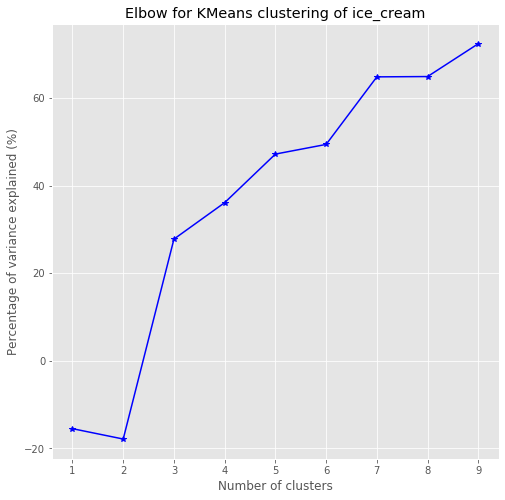

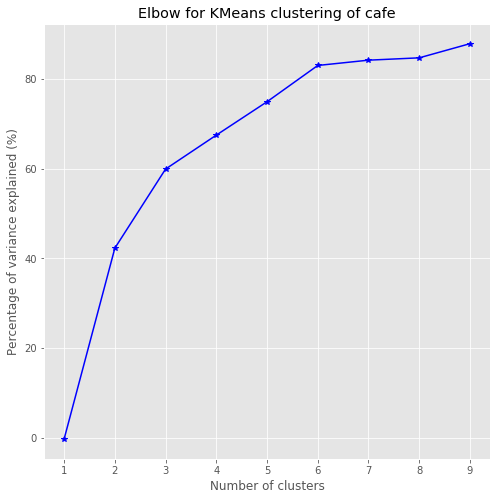

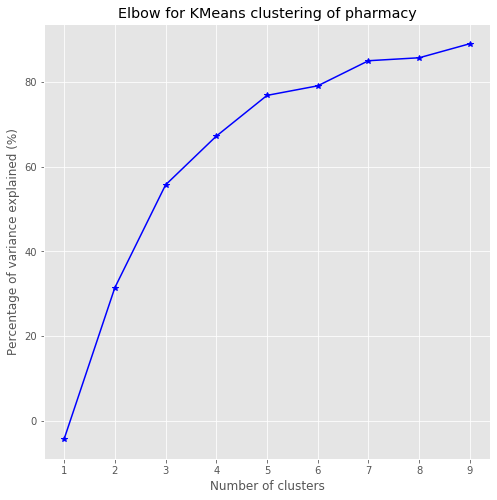

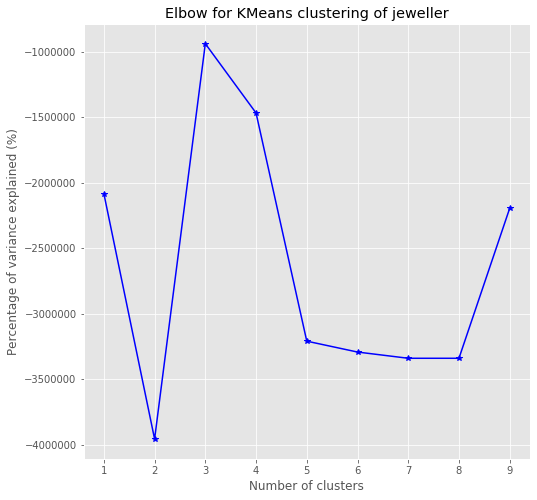

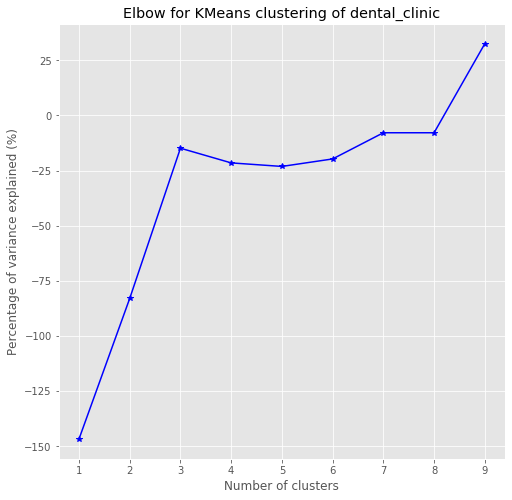

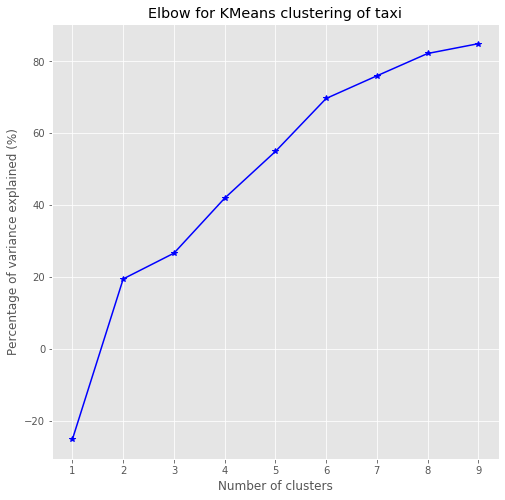

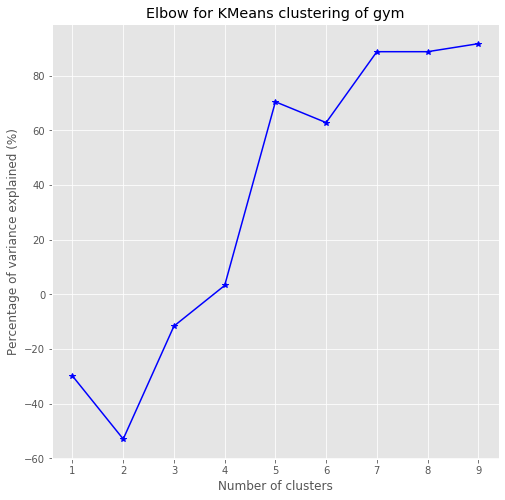

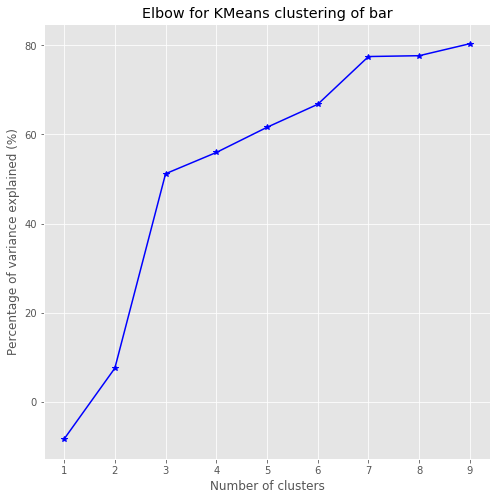

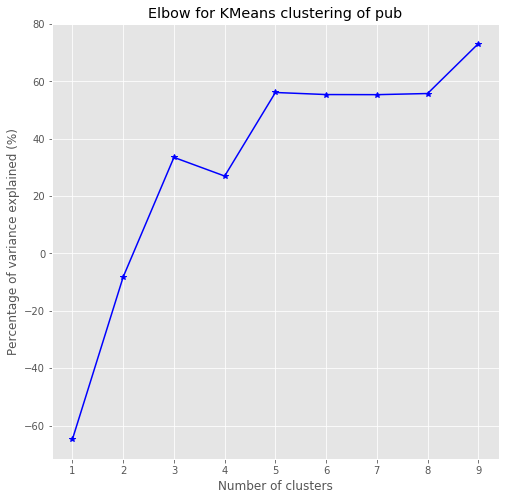

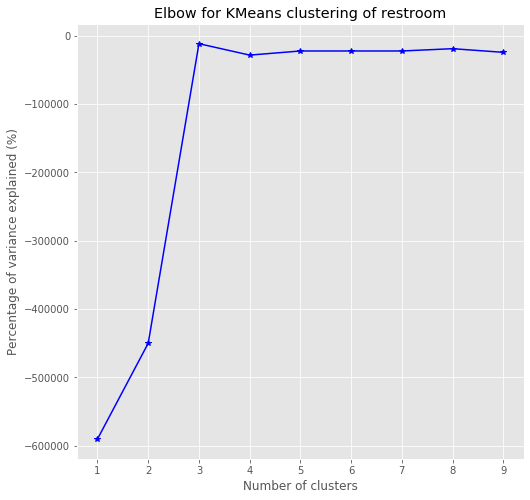

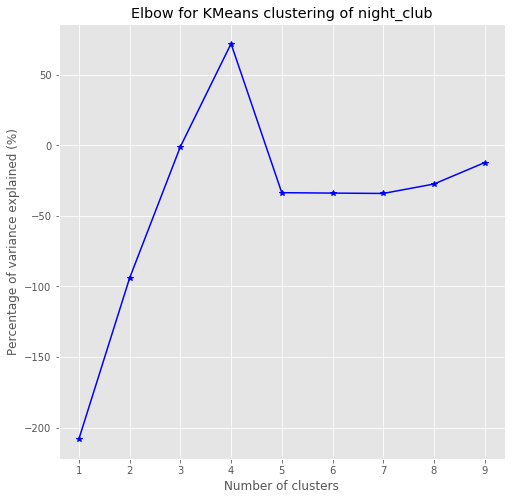

In [10]:
from scipy.spatial.distance import cdist, pdist
import numpy as np
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(restaurant) for i in Ks]
def plot_elbow(kmean, X,title):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering of {}'.format(title))
    plt.show()

for i in range(1,34):
    if i ==1 :
        plot_elbow(kmean,cinemas,'cinemas')
    elif i==2 :
        plot_elbow(kmean,restaurant,'restaurant')
    elif i==3 :
        plot_elbow(kmean,fountain,'fountain')
    elif i==4 :
        plot_elbow(kmean,shelter,'shelter')
    elif i==5 :
        plot_elbow(kmean,optician,'optician')
    elif i==6 :
        plot_elbow(kmean,electronics,'electronics')
    elif i==7 :
        plot_elbow(kmean,community_centre,'community_centre')
    elif i==8 :
        plot_elbow(kmean,fuel,'fuel')
    elif i==9:
        plot_elbow(kmean,vending_machine,'vending_machine')
    elif i==10 :
        plot_elbow(kmean,bank,'bank')
    elif i==11:
        plot_elbow(kmean,atm,'atm')
    elif i==12 :
        plot_elbow(kmean,theatre,'theatre')
    elif i==13 :
        plot_elbow(kmean,hospital,'hospital')
    elif i==14 :
        plot_elbow(kmean,school,'school')
    elif i==15 :
        plot_elbow(kmean,fast_food,'fast_food')
    elif i==16 :
        plot_elbow(kmean,studio,'studio')
    elif i==17 :
        plot_elbow(kmean,college,'college')
    elif i==18 :
        plot_elbow(kmean,ice_cream,'ice_cream')
    elif i==19 :
        plot_elbow(kmean,cafe,'cafe')
    elif i==20 :
        plot_elbow(kmean,pharmacy,'pharmacy')
    elif i==21 :
        plot_elbow(kmean,jeweller,'jeweller')
    elif i==25 :
        plot_elbow(kmean,dental_clinic,'dental_clinic')
    elif i==26 :
        plot_elbow(kmean,taxi,'taxi')
    elif i==27 :
        plot_elbow(kmean,gym,'gym')
    elif i==28 :
        plot_elbow(kmean,bar,'bar')
    elif i==29 :
        plot_elbow(kmean,pub,'pub')
    elif i==30 :
        plot_elbow(kmean,restroom,'restroom')
    elif i==31 :
        plot_elbow(kmean,night_club,'night_club')


In [11]:
n_cluster_cinema = 5
n_cluster_restaurant = 6
n_cluster_fountain = 6
n_cluster_shelter = 2
n_cluster_optician = 1
n_cluster_electronics = 1

n_cluster_commumity_centre = 5
n_cluster_fuel = 5
n_cluster_vending_machine = 2
n_cluster_bank = 6
n_cluster_atm = 5
n_cluster_theatre = 6

n_cluster_hospital = 7
n_cluster_school = 7
n_cluster_fast_food = 5
n_cluster_studio = 2
n_cluster_college = 7
n_cluster_ice_cream = 4

n_cluster_cafe = 6
n_cluster_pharmacy = 5
n_cluster_jeweller = 1
n_cluster_dental_clinic =3
n_cluster_taxi = 6
n_cluster_gym = 2

n_cluster_bar = 7
n_cluster_pub = 3
n_cluster_restroom = 1
n_cluster_night_club = 1

In [12]:
kmean_cinema = KMeans(n_cluster_cinema).fit(cinemas) 
kmean_restaurant = KMeans(n_cluster_restaurant).fit(restaurant) 
kmean_fountain = KMeans(n_cluster_fountain).fit(fountain) 
kmean_shelter = KMeans(n_cluster_shelter).fit(shelter)
kmean_optician = KMeans(n_cluster_optician).fit(optician)
kmean_electronics = KMeans(n_cluster_electronics).fit(electronics)

kmean_community_centre = KMeans(n_cluster_commumity_centre).fit(community_centre)
kmean_fuel = KMeans(n_cluster_fuel).fit(fuel) 
kmean_vending_machine = KMeans(n_cluster_vending_machine).fit(vending_machine) 
kmean_bank = KMeans(n_cluster_bank).fit(bank) 
kmean_atm = KMeans(n_cluster_atm).fit(atm) 
kmean_theatre = KMeans(n_cluster_theatre).fit(theatre) 

kmean_hospital = KMeans(n_cluster_hospital).fit(hospital) 
kmean_school = KMeans(n_cluster_school).fit(school) 
kmean_fast_food = KMeans(n_cluster_fast_food).fit(fast_food) 
kmean_studio = KMeans(n_cluster_studio).fit(studio) 
kmean_college = KMeans(n_cluster_college).fit(college) 
kmean_ice_cream = KMeans(n_cluster_ice_cream).fit(ice_cream) 

kmean_cafe = KMeans(n_cluster_cafe).fit(cafe) 
kmean_jeweller = KMeans(n_cluster_jeweller).fit(pharmacy) 
kmean_dental_clinic = KMeans(n_cluster_dental_clinic).fit(dental_clinic) 
kmean_pharmacy = KMeans(n_cluster_pharmacy).fit(pharmacy) 
kmean_taxi = KMeans(n_cluster_taxi).fit(taxi) 
kmean_gym = KMeans(n_cluster_gym).fit(gym) 

kmean_bar = KMeans(n_cluster_bar).fit(bar) 
kmean_pub = KMeans(n_cluster_pub).fit(pub) 
kmean_restroom = KMeans(n_cluster_restroom).fit(restroom) 
kmean_night_club = KMeans(n_cluster_night_club).fit(night_club) 

kmean_clothes = KMeans(1).fit(clothes) 
kmean_beauty_saloon = KMeans(1).fit(beauty_saloon) 
kmean_driving_school = KMeans(1).fit(driving_school) 
kmean_car_rental = KMeans(1).fit(car_rental) 
kmean_internet_cafe = KMeans(1).fit(internet_cafe) 

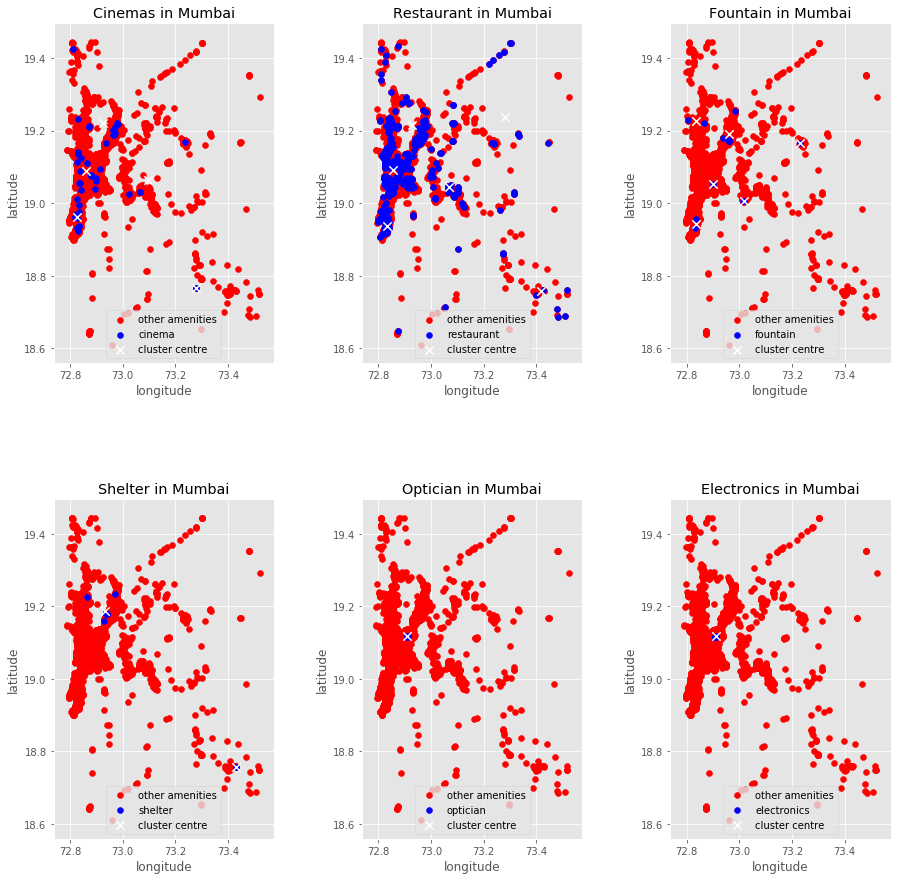

In [13]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')
    if i ==1 :
        ax.scatter(cinemas['X'],cinemas['Y'],label='cinema',c='blue')
        plt.title('Cinemas in Mumbai')
        plt.scatter(kmean_cinema.cluster_centers_[:,0],kmean_cinema.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(restaurant['X'],restaurant['Y'],label='restaurant',c='blue')
        plt.title('Restaurant in Mumbai')
        plt.scatter(kmean_restaurant.cluster_centers_[:,0],kmean_restaurant.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==3 :
        ax.scatter(fountain['X'],fountain['Y'],label='fountain',c='blue')
        plt.title('Fountain in Mumbai')
        plt.scatter(kmean_fountain.cluster_centers_[:,0],kmean_fountain.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==4 :
        ax.scatter(shelter['X'],shelter['Y'],label='shelter',c='blue')
        plt.title('Shelter in Mumbai')
        plt.scatter(kmean_shelter.cluster_centers_[:,0],kmean_shelter.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==5 :
        ax.scatter(optician['X'],optician['Y'],label='optician',c='blue')
        plt.title('Optician in Mumbai')
        plt.scatter(kmean_optician.cluster_centers_[:,0],kmean_optician.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==6 :
        ax.scatter(electronics['X'],electronics['Y'],label='electronics',c='blue')
        plt.title('Electronics in Mumbai')
        plt.scatter(kmean_electronics.cluster_centers_[:,0],kmean_electronics.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [14]:
kmean_cinema.cluster_centers_

array([[72.86045395, 19.08826326],
       [72.92645019, 19.22202919],
       [73.2806569 , 18.764921  ],
       [73.0985157 , 19.06334115],
       [72.82750963, 18.96099721]])

In [15]:
kmean_restaurant.cluster_centers_

array([[72.92753267, 19.21621713],
       [72.83153562, 18.93728191],
       [73.41993419, 18.75900083],
       [73.06700584, 19.04567937],
       [73.28240762, 19.23752504],
       [72.857568  , 19.09086538]])

In [16]:
kmean_fountain.cluster_centers_

array([[72.96019844, 19.1905281 ],
       [72.83407745, 18.9439814 ],
       [73.2297623 , 19.1668516 ],
       [73.0162121 , 19.0059537 ],
       [72.8368968 , 19.22536385],
       [72.9004654 , 19.0527518 ]])

In [17]:
kmean_shelter.cluster_centers_

array([[72.93424434, 19.18717415],
       [73.4300639 , 18.7567009 ]])

In [18]:
kmean_optician.cluster_centers_

array([[72.9109176 , 19.11811186]])

In [19]:
kmean_electronics.cluster_centers_

array([[72.90989702, 19.11739335]])

### Best Clusters
* From scatter plot we can see that best cluster for cinemas is with centroid [72.86045395, 19.08826326] as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance.Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot we can see that best cluster for restaurant is with centroid [72.857568  , 19.09086538]
*  From scatter plot we can see that best cluster for fountain is with centroid [72.96019844, 19.1905281]
*  From scatter plot we can see that best cluster for shelter is with centroid [72.93424434, 19.18717415]
*  From scatter plot we can see that best cluster for optician is with centroid [72.9109176 , 19.11811186]
*  From scatter plot we can see that best cluster for electronics is with centroid [72.90989702, 19.11739335]

##### creating a dictionary to store centroids of best clusters

In [20]:
best_cluster = { 'cinemas':[72.86045395, 19.08826326],
                 'restaurant':[72.857568  , 19.09086538],
                 'fountain':[72.96019844, 19.1905281],
                 'shelter':[72.93424434, 19.18717415],
                 'optician':[72.9109176 , 19.11811186],
                 'electronics':[72.90989702, 19.11739335]
               }

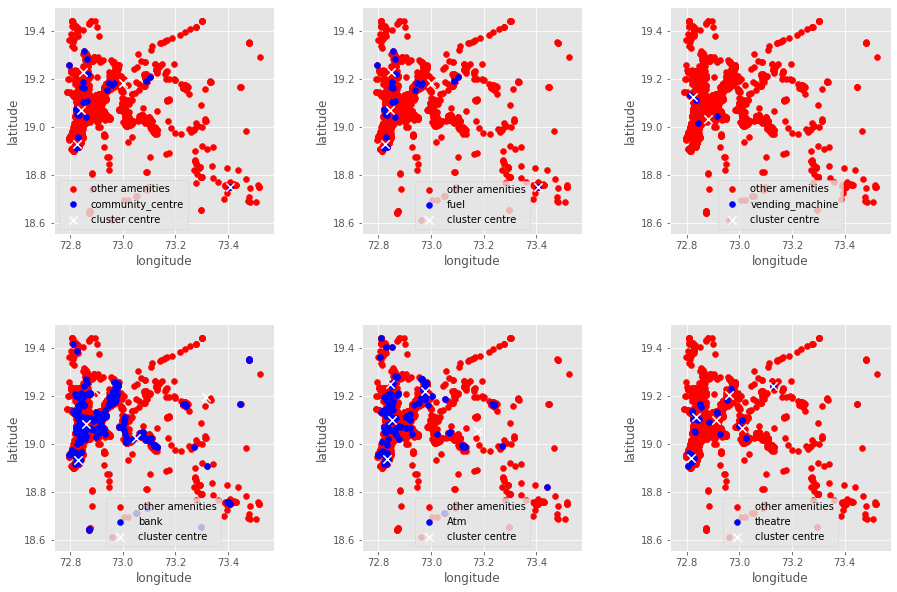

In [21]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')    
    if i==1 :
        ax.scatter(community_centre['X'],community_centre['Y'],label='community_centre',c='blue')
        plt.scatter(kmean_community_centre.cluster_centers_[:,0],kmean_community_centre.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(fuel['X'],fuel['Y'],label='fuel',c='blue')
        plt.scatter(kmean_fuel.cluster_centers_[:,0],kmean_fuel.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
 
    elif i==3 :
        ax.scatter(vending_machine['X'],vending_machine['Y'],label='vending_machine',c='blue')
        plt.scatter(kmean_vending_machine.cluster_centers_[:,0],kmean_vending_machine.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==4 :
        ax.scatter(bank['X'],bank['Y'],label='bank',c='blue')
        plt.scatter(kmean_bank.cluster_centers_[:,0],kmean_bank.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==5 :
        ax.scatter(atm['X'],atm['Y'],label='Atm',c='blue')
        plt.scatter(kmean_atm.cluster_centers_[:,0],kmean_atm.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==6 :
        ax.scatter(theatre['X'],theatre['Y'],label='theatre',c='blue')
        plt.scatter(kmean_theatre.cluster_centers_[:,0],kmean_theatre.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [22]:
kmean_community_centre.cluster_centers_

array([[73.4067979 , 18.7484608 ],
       [73.00106752, 19.18359227],
       [72.84329203, 19.07217922],
       [72.84780773, 19.22913497],
       [72.82735713, 18.92847527]])

In [23]:
kmean_fuel.cluster_centers_

array([[72.84780773, 19.22913497],
       [73.4067979 , 18.7484608 ],
       [72.82735713, 18.92847527],
       [73.00106752, 19.18359227],
       [72.84329203, 19.07217922]])

In [24]:
kmean_vending_machine.cluster_centers_

array([[72.8247184, 19.1236708],
       [72.8798189, 19.031797 ]])

In [25]:
kmean_bank.cluster_centers_

array([[73.05238579, 19.02414466],
       [72.83106296, 18.93465566],
       [72.86192413, 19.08563816],
       [73.30864396, 18.75331256],
       [73.31795995, 19.19760421],
       [72.90980006, 19.20583609]])

In [26]:
kmean_atm.cluster_centers_

array([[72.85193767, 19.10141156],
       [72.97617601, 19.22271444],
       [73.17897403, 19.055685  ],
       [72.8338513 , 18.93723451],
       [72.84627227, 19.25127871]])

In [27]:
kmean_theatre.cluster_centers_

array([[72.91047222, 19.09995792],
       [72.81648443, 18.9411991 ],
       [73.127545  , 19.2416211 ],
       [73.01131273, 19.06743387],
       [72.83608012, 19.11257954],
       [72.9610187 , 19.20646175]])

### Best Clusters
* From scatter plot we can see that best cluster for community centre is with centroid [72.84329203, 19.07217922] as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance. Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot, we can see that best cluster for fuel points is with centroid [72.84329203, 19.07217922]
*  From scatter plot, we can see that best cluster for vending machine is with centroid [72.8247184, 19.1236708]
*  From scatter plot, we can see that best cluster for banks is with centroid [72.86192413, 19.08563816]
*  From scatter plot, we can see that best cluster for Atm's is with centroid [72.85214919, 19.10254834]
*  From scatter plot, we can see that best cluster for Theatre is with centroid [72.83664875, 19.1482406]

In [28]:
best_cluster['community_centre']=[72.84329203, 19.07217922]
best_cluster['fuel']=[72.84329203, 19.07217922]
best_cluster['vending_machine']=[72.8247184, 19.1236708]
best_cluster['bank']=[72.86192413, 19.08563816]
best_cluster['atm']=[72.85214919, 19.10254834]
best_cluster['Theatre']=[72.83664875, 19.1482406]

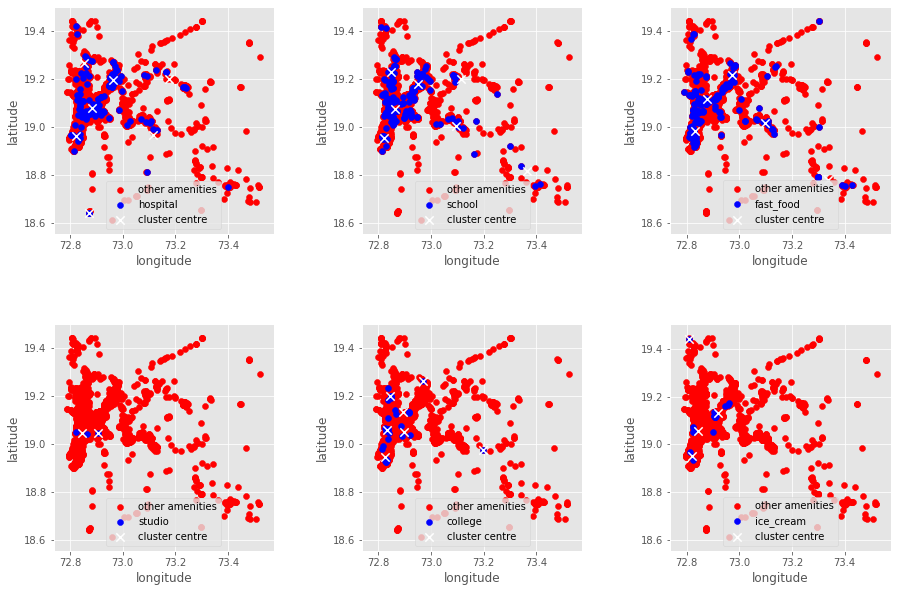

In [29]:

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')    
    if i==1 :
        ax.scatter(hospital['X'],hospital['Y'],label='hospital',c='blue')
        plt.scatter(kmean_hospital.cluster_centers_[:,0],kmean_hospital.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(school['X'],school['Y'],label='school',c='blue')
        plt.scatter(kmean_school.cluster_centers_[:,0],kmean_school.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==3 :
        ax.scatter(fast_food['X'],fast_food['Y'],label='fast_food',c='blue')
        plt.scatter(kmean_fast_food.cluster_centers_[:,0],kmean_fast_food.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==4 :
        ax.scatter(studio['X'],studio['Y'],label='studio',c='blue')
        plt.scatter(kmean_studio.cluster_centers_[:,0],kmean_studio.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==5 :
        ax.scatter(college['X'],college['Y'],label='college',c='blue')
        plt.scatter(kmean_college.cluster_centers_[:,0],kmean_college.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==6 :
        ax.scatter(ice_cream['X'],ice_cream['Y'],label='ice_cream',c='blue')
        plt.scatter(kmean_ice_cream.cluster_centers_[:,0],kmean_ice_cream.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [30]:
kmean_hospital.cluster_centers_

array([[72.85337475, 19.26635783],
       [72.88222415, 19.08086724],
       [72.96281093, 19.19606045],
       [73.11542637, 18.96696927],
       [73.17465574, 19.19886549],
       [72.82341483, 18.96319759],
       [72.87197465, 18.6404624 ]])

In [31]:
kmean_school.cluster_centers_

array([[73.36341675, 18.817438  ],
       [72.95275106, 19.1788348 ],
       [72.82299015, 18.95593655],
       [72.86477196, 19.07458683],
       [72.84912253, 19.23014714],
       [73.09570422, 19.00501584],
       [73.11285216, 19.19866463]])

In [32]:
kmean_fast_food.cluster_centers_

array([[73.09789166, 19.01869224],
       [72.87865908, 19.11757256],
       [72.83080425, 18.98437615],
       [72.97365499, 19.2157884 ],
       [73.33898621, 18.77809405]])

In [33]:
kmean_studio.cluster_centers_

array([[72.9081436 , 19.0463561 ],
       [72.84404545, 19.0478824 ]])

In [34]:
kmean_college.cluster_centers_

array([[72.82582524, 18.94609947],
       [72.84323998, 19.20266728],
       [72.89799003, 19.0489781 ],
       [72.83359486, 19.06069253],
       [73.1992677 , 18.9744654 ],
       [72.89543296, 19.13298878],
       [72.9696977 , 19.263168  ]])

In [35]:
kmean_ice_cream.cluster_centers_

array([[72.8193453 , 18.949953  ],
       [72.91893047, 19.13051238],
       [72.8095132 , 19.4418276 ],
       [72.84364598, 19.05670495]])

### Best Clusters
* From scatter plot we can see that best cluster for hostpitals is with centroid [72.88222415, 19.08086724] as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance. Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot, we can see that best cluster for school is with centroid [72.86107909, 19.10423014]
*  From scatter plot, we can see that best cluster for fast food is with centroid [72.8826568 , 19.12225534]
*  From scatter plot, we can see that best cluster for studio is with centroid [72.84404545, 19.0478824]
*  From scatter plot, we can see that best cluster for College is with centroid [72.83359486, 19.06069253]
*  From scatter plot, we can see that best cluster for Ice-Cream Spots is with centroid [72.91893047, 19.13051238]

In [36]:
best_cluster['hospital']=[72.88222415, 19.08086724]
best_cluster['school']=[72.86107909, 19.10423014]
best_cluster['fast_food']=[72.8826568 , 19.12225534]
best_cluster['studio']=[72.84404545, 19.0478824]
best_cluster['college']=[72.83359486, 19.06069253]
best_cluster['ice_cream']=[72.91893047, 19.13051238]

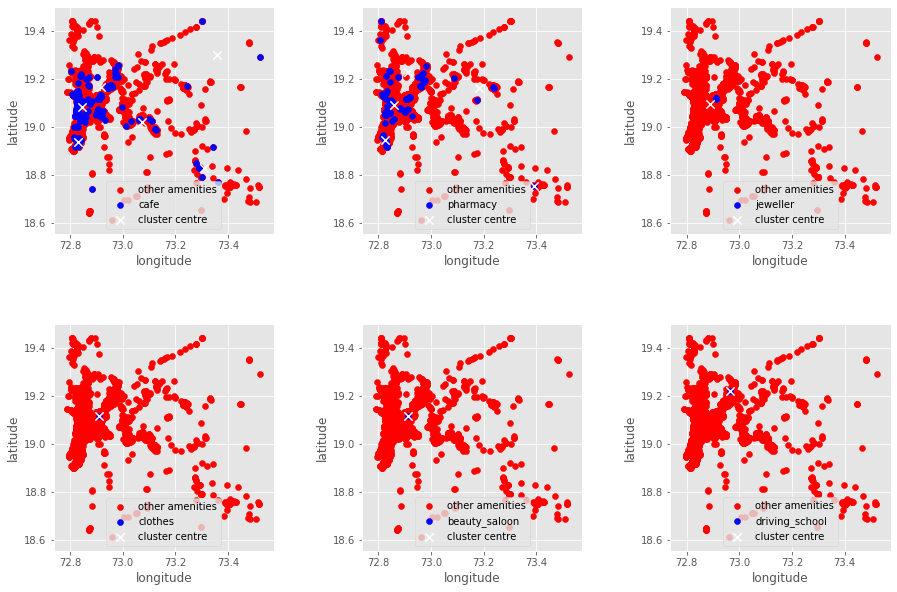

In [37]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')    
    if i==1 :
        ax.scatter(cafe['X'],cafe['Y'],label='cafe',c='blue')
        plt.scatter(kmean_cafe.cluster_centers_[:,0],kmean_cafe.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(pharmacy['X'],pharmacy['Y'],label='pharmacy',c='blue')
        plt.scatter(kmean_pharmacy.cluster_centers_[:,0],kmean_pharmacy.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==3 :
        ax.scatter(jeweller['X'],jeweller['Y'],label='jeweller',c='blue')
        plt.scatter(kmean_jeweller.cluster_centers_[:,0],kmean_jeweller.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==4 :
        ax.scatter(clothes['X'],clothes['Y'],label='clothes',c='blue')
        plt.scatter(kmean_clothes.cluster_centers_[:,0],kmean_clothes.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==5 :
        ax.scatter(beauty_saloon['X'],beauty_saloon['Y'],label='beauty_saloon',c='blue')
        plt.scatter(kmean_beauty_saloon.cluster_centers_[:,0],kmean_beauty_saloon.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==6 :
        ax.scatter(driving_school['X'],driving_school['Y'],label='driving_school',c='blue')
        plt.scatter(kmean_driving_school.cluster_centers_[:,0],kmean_driving_school.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)

    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [38]:
kmean_cafe.cluster_centers_

array([[72.91734127, 19.16593495],
       [73.07501294, 19.02186961],
       [73.3109021 , 18.83051708],
       [72.83121389, 18.93597281],
       [73.3573252 , 19.30243017],
       [72.84550548, 19.08444731]])

In [39]:
kmean_pharmacy.cluster_centers_

array([[72.91246862, 19.22884871],
       [72.86126506, 19.09131627],
       [72.82576547, 18.9449442 ],
       [73.18441805, 19.16174627],
       [73.3901255 , 18.7548253 ]])

In [40]:
kmean_jeweller.cluster_centers_

array([[72.88731032, 19.09737162]])

In [41]:
kmean_clothes.cluster_centers_

array([[72.9113359, 19.1191726]])

In [42]:
kmean_beauty_saloon.cluster_centers_

array([[72.9113966, 19.1192049]])

In [43]:
kmean_driving_school.cluster_centers_

array([[72.9640129, 19.2231242]])

### Best Clusters
* From scatter plot we can see that best cluster for cafe is with centroid [72.84550548, 19.08444731] as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance. Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot, we can see that best cluster for pharmacy is with centroid [72.86126506, 19.09131627]
*  From scatter plot, we can see that best cluster for jeweller is with centroid [72.88731032, 19.09737162]
*  From scatter plot, we can see that best cluster for clothe's shop is with centroid [772.9113359, 19.1191726]
*  From scatter plot, we can see that best cluster for beauty saloon is with centroid [72.9113966, 19.1192049]
*  From scatter plot, we can see that best cluster for driving school is with centroid [72.9640129, 19.2231242]

In [44]:
best_cluster['cafe']=[72.84550548, 19.08444731]
best_cluster['pharmacy']=[72.86126506, 19.09131627]
best_cluster['jeweller']=[72.88731032, 19.09737162]
best_cluster['clothes']=[72.9113359, 19.1191726]
best_cluster['beauty_saloon']=[72.9113966, 19.1192049]
best_cluster['driving_school']=[72.9640129, 19.2231242]

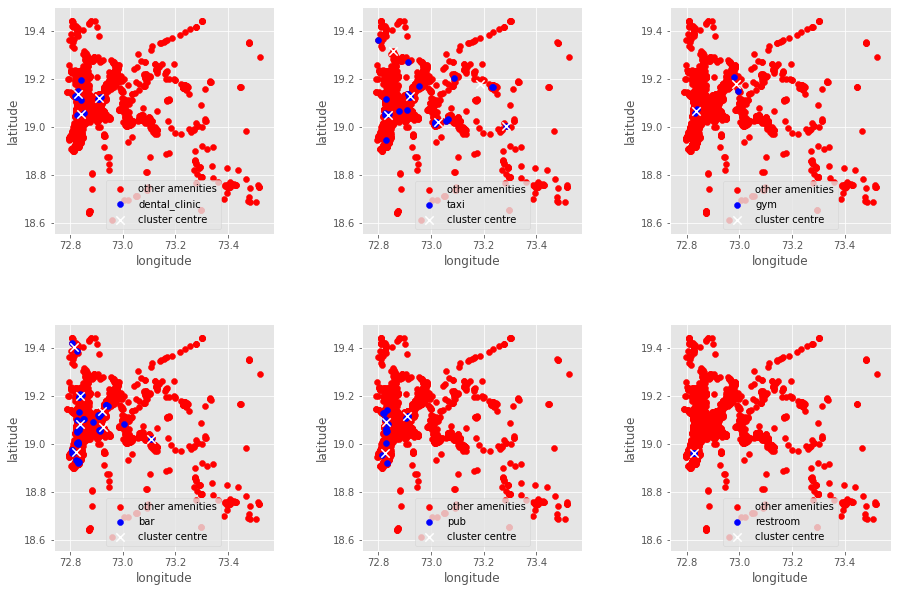

In [45]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')    
    if i==1 :
        ax.scatter(dental_clinic['X'],dental_clinic['Y'],label='dental_clinic',c='blue')
        plt.scatter(kmean_dental_clinic.cluster_centers_[:,0],kmean_dental_clinic.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(taxi['X'],taxi['Y'],label='taxi',c='blue')
        plt.scatter(kmean_taxi.cluster_centers_[:,0],kmean_taxi.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==3 :
        ax.scatter(gym['X'],gym['Y'],label='gym',c='blue')
        plt.scatter(kmean_gym.cluster_centers_[:,0],kmean_gym.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==4 :
        ax.scatter(bar['X'],bar['Y'],label='bar',c='blue')
        plt.scatter(kmean_bar.cluster_centers_[:,0],kmean_bar.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==5 :
        ax.scatter(pub['X'],pub['Y'],label='pub',c='blue')
        plt.scatter(kmean_pub.cluster_centers_[:,0],kmean_pub.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==6 :
        ax.scatter(restroom['X'],restroom['Y'],label='restroom',c='blue')
        plt.scatter(kmean_restroom.cluster_centers_[:,0],kmean_restroom.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [46]:
kmean_dental_clinic.cluster_centers_

array([[72.91235895, 19.12010633],
       [72.83030053, 19.14001072],
       [72.8406663 , 19.05585955]])

In [47]:
kmean_taxi.cluster_centers_

array([[73.02541947, 19.02141145],
       [72.91952196, 19.12885838],
       [73.1850802 , 19.18006847],
       [72.83777828, 19.04876908],
       [72.8556237 , 19.31811525],
       [73.2855792 , 19.0028896 ]])

In [48]:
kmean_gym.cluster_centers_

array([[72.83647415, 19.0674386 ],
       [72.98821035, 19.17989515]])

In [49]:
kmean_bar.cluster_centers_

array([[72.8168694 , 19.4064188 ],
       [72.83647001, 19.08483479],
       [72.82352124, 18.96683336],
       [72.9236669 , 19.13891421],
       [72.92631814, 19.06991832],
       [73.109229  , 19.0231247 ],
       [72.83762633, 19.20073192]])

In [50]:
kmean_pub.cluster_centers_

array([[72.82848012, 19.0911612 ],
       [72.82499713, 18.9614833 ],
       [72.9098004 , 19.1159269 ]])

In [51]:
kmean_restroom.cluster_centers_

array([[72.8266381 , 18.96267613]])

### Best Clusters
* From scatter plot we can see that best cluster for dental clinic is with centroid [72.83030053, 19.14001072] as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance. Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot, we can see that best cluster for taxi is with centroid [72.90775019, 19.12195743]
*  From scatter plot, we can see that best cluster for gym is with centroid [72.98821035, 19.17989515]
*  From scatter plot, we can see that best cluster for bar is with centroid [72.8292788 , 19.02770205]
*  From scatter plot, we can see that best cluster for pub is with centroid [72.82848012, 19.0911612]
*  From scatter plot, we can see that best cluster for rest-room is with centroid [72.8266381 , 18.96267613]

In [52]:
best_cluster['dental_clinic']=[72.83030053, 19.14001072]
best_cluster['taxi']=[72.90775019, 19.12195743]
best_cluster['gym']=[72.98821035, 19.17989515]
best_cluster['bar']=[72.8292788 , 19.02770205]
best_cluster['pub']=[72.82848012, 19.0911612]
best_cluster['restroom']=[72.8266381 , 18.96267613]

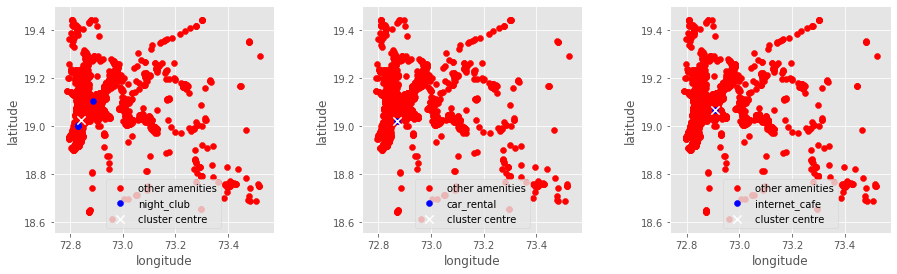

In [53]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,4):
    ax = fig.add_subplot(2,3,i)
    ax.scatter(df['X'],df['Y'],c='red',label='other amenities')    
    if i==1 :
        ax.scatter(night_club['X'],night_club['Y'],label='night_club',c='blue')
        plt.scatter(kmean_night_club.cluster_centers_[:,0],kmean_night_club.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==2 :
        ax.scatter(car_rental['X'],car_rental['Y'],label='car_rental',c='blue')
        plt.scatter(kmean_car_rental.cluster_centers_[:,0],kmean_car_rental.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    elif i==3 :
        ax.scatter(internet_cafe['X'],internet_cafe['Y'],label='internet_cafe',c='blue')
        plt.scatter(kmean_internet_cafe.cluster_centers_[:,0],kmean_internet_cafe.cluster_centers_[:,1],c='white',marker='x',label='cluster centre',s=70)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.legend()

In [54]:
kmean_night_club.cluster_centers_

array([[72.84369135, 19.02748605]])

In [55]:
kmean_car_rental.cluster_centers_

array([[72.8720824, 19.0230604]])

In [56]:
kmean_internet_cafe.cluster_centers_

array([[72.9062777, 19.0689455]])

### Best Clusters
* From scatter plot we can see that best cluster for dental clinic is with centroid [72.84369135, 19.02748605] ,as it surrounded with maximum nodes(cinemas) and thus having minimum squared distance variance. Similarly, best cluster for other amenities can be recognized from scatter plot
*  From scatter plot, we can see that best cluster for taxi is with centroid [72.8720824, 19.0230604]
*  From scatter plot, we can see that best cluster for gym is with centroid [72.9062777, 19.0689455]

In [57]:
best_cluster['night_club']=[72.84369135, 19.02748605]
best_cluster['car_rental']=[72.8720824, 19.0230604]
best_cluster['internet_cafe']=[72.9062777, 19.0689455]

####  Centroids of best clusters of all amenities

In [58]:
best_cluster

{'cinemas': [72.86045395, 19.08826326],
 'restaurant': [72.857568, 19.09086538],
 'fountain': [72.96019844, 19.1905281],
 'shelter': [72.93424434, 19.18717415],
 'optician': [72.9109176, 19.11811186],
 'electronics': [72.90989702, 19.11739335],
 'community_centre': [72.84329203, 19.07217922],
 'fuel': [72.84329203, 19.07217922],
 'vending_machine': [72.8247184, 19.1236708],
 'bank': [72.86192413, 19.08563816],
 'atm': [72.85214919, 19.10254834],
 'Theatre': [72.83664875, 19.1482406],
 'hospital': [72.88222415, 19.08086724],
 'school': [72.86107909, 19.10423014],
 'fast_food': [72.8826568, 19.12225534],
 'studio': [72.84404545, 19.0478824],
 'college': [72.83359486, 19.06069253],
 'ice_cream': [72.91893047, 19.13051238],
 'cafe': [72.84550548, 19.08444731],
 'pharmacy': [72.86126506, 19.09131627],
 'jeweller': [72.88731032, 19.09737162],
 'clothes': [72.9113359, 19.1191726],
 'beauty_saloon': [72.9113966, 19.1192049],
 'driving_school': [72.9640129, 19.2231242],
 'dental_clinic': [72.83

In [59]:
best_cluster_df = pd.DataFrame.from_dict(best_cluster)

In [60]:
best_cluster_df = best_cluster_df.T

In [61]:
df = {'longitude':kmean_cinema.cluster_centers_[:,0],
       'latitude':kmean_cinema.cluster_centers_[:,1]
       }
df_centroids = pd.DataFrame(df)
df_centroids['Amenity'] = 'Cinema'

df = {'longitude':kmean_restaurant.cluster_centers_[:,0],
       'latitude':kmean_restaurant.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Restaurant'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_fountain.cluster_centers_[:,0],
       'latitude':kmean_fountain.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Fountain'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_shelter.cluster_centers_[:,0],
       'latitude':kmean_shelter.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Shelter'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_community_centre.cluster_centers_[:,0],
       'latitude':kmean_community_centre.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Community Centre'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_fuel.cluster_centers_[:,0],
       'latitude':kmean_fuel.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Fuel'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_vending_machine.cluster_centers_[:,0],
       'latitude':kmean_vending_machine.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Vending Machine'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)


df = {'longitude':kmean_bank.cluster_centers_[:,0],
       'latitude':kmean_bank.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='bank'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_atm.cluster_centers_[:,0],
       'latitude':kmean_atm.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Atm'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_theatre.cluster_centers_[:,0],
       'latitude':kmean_theatre.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Theatre'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_hospital.cluster_centers_[:,0],
       'latitude':kmean_hospital.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Hospital'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_school.cluster_centers_[:,0],
       'latitude':kmean_school.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='School'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_fast_food.cluster_centers_[:,0],
       'latitude':kmean_fast_food.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Fast Food'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_studio.cluster_centers_[:,0],
       'latitude':kmean_studio.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='studio'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_college.cluster_centers_[:,0],
       'latitude':kmean_college.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='College'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_ice_cream.cluster_centers_[:,0],
       'latitude':kmean_ice_cream.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='ice_cream'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_cafe.cluster_centers_[:,0],
       'latitude':kmean_cafe.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Cafe'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_pharmacy.cluster_centers_[:,0],
       'latitude':kmean_pharmacy.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Pharmacy'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_jeweller.cluster_centers_[:,0],
       'latitude':kmean_jeweller.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Jeweller'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_electronics.cluster_centers_[:,0],
       'latitude':kmean_electronics.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Electronics'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_clothes.cluster_centers_[:,0],
       'latitude':kmean_clothes.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Clothes'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_beauty_saloon.cluster_centers_[:,0],
       'latitude':kmean_beauty_saloon.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Beaury Saloon'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_driving_school.cluster_centers_[:,0],
       'latitude':kmean_driving_school.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Driving School'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_dental_clinic.cluster_centers_[:,0],
       'latitude':kmean_dental_clinic.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Dental Clinic'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_taxi.cluster_centers_[:,0],
       'latitude':kmean_taxi.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Taxi'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_gym.cluster_centers_[:,0],
       'latitude':kmean_gym.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Gym'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_bar.cluster_centers_[:,0],
       'latitude':kmean_bar.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Bar'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_pub.cluster_centers_[:,0],
       'latitude':kmean_pub.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Pub'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_restroom.cluster_centers_[:,0],
       'latitude':kmean_restroom.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Rest-Room'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_night_club.cluster_centers_[:,0],
       'latitude':kmean_night_club.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Night Club'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_car_rental.cluster_centers_[:,0],
       'latitude':kmean_car_rental.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Car Rental'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)

df = {'longitude':kmean_internet_cafe.cluster_centers_[:,0],
       'latitude':kmean_internet_cafe.cluster_centers_[:,1]
       }
df = pd.DataFrame(df)
df['Amenity']='Internet Cafe'
df_centroids = pd.concat([df_centroids,df],axis=0,ignore_index=True)


In [62]:
df_centroids

,longitude,latitude,Amenity
0,72.860454,19.088263,Cinema
1,72.926450,19.222029,Cinema
2,73.280657,18.764921,Cinema
3,73.098516,19.063341,Cinema
4,72.827510,18.960997,Cinema
...,...,...,...
116,72.909800,19.115927,Pub
117,72.826638,18.962676,Rest-Room
118,72.843691,19.027486,Night Club
119,72.872082,19.023060,Car Rental


In [63]:
df_centroids.to_csv('cluster_centroids.csv')

In [64]:
best_cluster_df.to_csv('bestCluster_centroids.csv')

In [65]:
df = pd.read_csv('bestCluster_centroids.csv')

In [66]:
df

,Unnamed: 0,0,1
0,cinemas,72.860454,19.088263
1,restaurant,72.857568,19.090865
2,fountain,72.960198,19.190528
3,shelter,72.934244,19.187174
4,optician,72.910918,19.118112
5,electronics,72.909897,19.117393
6,community_centre,72.843292,19.072179
7,fuel,72.843292,19.072179
8,vending_machine,72.824718,19.123671
9,bank,72.861924,19.085638


In [67]:
df.columns = ['Aminity','longitude','latitude']

In [68]:
df

,Aminity,longitude,latitude
0,cinemas,72.860454,19.088263
1,restaurant,72.857568,19.090865
2,fountain,72.960198,19.190528
3,shelter,72.934244,19.187174
4,optician,72.910918,19.118112
5,electronics,72.909897,19.117393
6,community_centre,72.843292,19.072179
7,fuel,72.843292,19.072179
8,vending_machine,72.824718,19.123671
9,bank,72.861924,19.085638


In [69]:
df.to_csv('bestCluster_centroids.csv')

* We have used mygeodata converter(https://mygeodata.cloud/converter/) to convert cluster_centroid.csv and bestCluster_centroids.csv file to their respective point shapefiles namely clusterCentroid.dbf and best_clusterCentroid.dbf